In [261]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import re
import ast
pd.options.display.max_rows = 4000
pd.set_option('display.max_colwidth', None)

In [141]:

data = pd.read_csv("allsides_balanced_news_headlines-texts.csv")
data.head()


,Unnamed: 0,title,tags,heading,source,text,bias_rating
0,0,Gun Violence Over Fourth of July Weekend,"['Protests', 'Fourth Of July', 'Gun Control An...",Chicago Gun Violence Spikes and Increasingly F...,New York Times (News),As Yasmin Miller drove home from a laundromat ...,left
1,1,Gun Violence Over Fourth of July Weekend,"['Protests', 'Fourth Of July', 'Gun Control An...",‘Bullets just came from nowhere’: Fourth of Ju...,Chicago Tribune,As many Chicagoans were celebrating the Fourth...,center
2,2,Gun Violence Over Fourth of July Weekend,"['Protests', 'Fourth Of July', 'Gun Control An...",Dozens of shootings across US mark bloody July...,New York Post (News),The nation’s 4th of July weekend was marred by...,right
3,3,Yellen Warns Congress of 'Economic Recession' ...,"['Janet Yellen', 'Debt Ceiling', 'Economic Pol...",Federal Government Will Run Out of Cash on Oct...,The Epoch Times,Treasury Secretary Janet Yellen on Tuesday war...,right
4,4,Yellen Warns Congress of 'Economic Recession' ...,"['Janet Yellen', 'Debt Ceiling', 'Economic Pol...",Yellen tells Congress that U.S. will run out o...,Washington Post,Treasury Secretary Janet Yellen on Tuesday tol...,left


In [142]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21754 entries, 0 to 21753
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   21754 non-null  int64 
 1   title        21754 non-null  object
 2   tags         21754 non-null  object
 3   heading      21754 non-null  object
 4   source       21746 non-null  object
 5   text         21747 non-null  object
 6   bias_rating  21754 non-null  object
dtypes: int64(1), object(6)
memory usage: 1.2+ MB


In [143]:
col_names = data.columns
col_names

Index(['Unnamed: 0', 'title', 'tags', 'heading', 'source', 'text',
       'bias_rating'],
      dtype='object')

In [144]:
data.drop(col_names[0],axis=1,inplace=True)

In [145]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21754 entries, 0 to 21753
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   title        21754 non-null  object
 1   tags         21754 non-null  object
 2   heading      21754 non-null  object
 3   source       21746 non-null  object
 4   text         21747 non-null  object
 5   bias_rating  21754 non-null  object
dtypes: object(6)
memory usage: 1019.8+ KB


In [146]:
data.title.value_counts()

title
Gun Control Debate Continues                                   6
Obama on Hillary’s Emails                                      6
CDC Says Vaccinated People Don't Have to Wear Masks Outside    6
July Jobs Report                                               6
French Election                                                6
                                                              ..
Biden at NAACP                                                 2
The Qualms of the American Middle Class: Who is to Blame?      2
North Carolina Passes Voter ID Bill                            2
Putin Probably Approved Former Spy's Murder                    1
SC House Approves Confederate Flag Removal                     1
Name: count, Length: 7263, dtype: int64

In [147]:
data.head()

,title,tags,heading,source,text,bias_rating
0,Gun Violence Over Fourth of July Weekend,"['Protests', 'Fourth Of July', 'Gun Control An...",Chicago Gun Violence Spikes and Increasingly F...,New York Times (News),As Yasmin Miller drove home from a laundromat ...,left
1,Gun Violence Over Fourth of July Weekend,"['Protests', 'Fourth Of July', 'Gun Control An...",‘Bullets just came from nowhere’: Fourth of Ju...,Chicago Tribune,As many Chicagoans were celebrating the Fourth...,center
2,Gun Violence Over Fourth of July Weekend,"['Protests', 'Fourth Of July', 'Gun Control An...",Dozens of shootings across US mark bloody July...,New York Post (News),The nation’s 4th of July weekend was marred by...,right
3,Yellen Warns Congress of 'Economic Recession' ...,"['Janet Yellen', 'Debt Ceiling', 'Economic Pol...",Federal Government Will Run Out of Cash on Oct...,The Epoch Times,Treasury Secretary Janet Yellen on Tuesday war...,right
4,Yellen Warns Congress of 'Economic Recession' ...,"['Janet Yellen', 'Debt Ceiling', 'Economic Pol...",Yellen tells Congress that U.S. will run out o...,Washington Post,Treasury Secretary Janet Yellen on Tuesday tol...,left


In [148]:
data["tags"].value_counts()

tags
['Presidential Elections', 'Elections']                                                                                                                                                                                                                                                                                                                                                            1446
['Politics']                                                                                                                                                                                                                                                                                                                                                                                        757
['White House', 'Politics']                                                                                                                                                                                        

In [149]:
data["tags"].isna().sum()

np.int64(0)

In [150]:
tags_list = data["tags"].apply(ast.literal_eval)
all_tags = [tag.strip() for sublist in tags_list for tag in sublist ]
count = Counter(all_tags)
count_tags_df = pd.DataFrame(count.items(), columns = ["tag","count"])

In [151]:
data_tag_as_lists = data.copy()
data_tag_as_lists["tags"] = tags_list
data_tag_as_lists.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21754 entries, 0 to 21753
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   title        21754 non-null  object
 1   tags         21754 non-null  object
 2   heading      21754 non-null  object
 3   source       21746 non-null  object
 4   text         21747 non-null  object
 5   bias_rating  21754 non-null  object
dtypes: object(6)
memory usage: 1019.8+ KB


In [152]:
empty_tags = data_tag_as_lists["tags"].apply(lambda x: len(x) == 0).sum()
empty_tags

np.int64(292)

In [153]:
data_tag_as_lists["tags"] = data_tag_as_lists["tags"].apply(lambda x: ["NoTag"] if len(x) == 0 else x)
all_tags = [tag for sublist in data_tag_as_lists["tags"] for tag in sublist ]
count = Counter(all_tags)
count_tags_df = pd.DataFrame(count.items(), columns = ["tag","count"])
count_array = np.array(list(count.values()))
count_array.sum()

np.int64(83375)

In [154]:
len(all_tags)

83375

In [155]:
"" in data_tag_as_lists["heading"]

False

In [156]:
data_tag_as_lists["source"].isna().sum()

np.int64(8)

In [157]:
data_tag_as_lists.fillna({"source" : "Unknown"} , inplace=True)

In [158]:
data_tag_as_lists["bias_rating"].value_counts()

bias_rating
left      10275
right      7226
center     4253
Name: count, dtype: int64

In [159]:
data_tag_as_lists.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21754 entries, 0 to 21753
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   title        21754 non-null  object
 1   tags         21754 non-null  object
 2   heading      21754 non-null  object
 3   source       21754 non-null  object
 4   text         21747 non-null  object
 5   bias_rating  21754 non-null  object
dtypes: object(6)
memory usage: 1019.8+ KB


In [160]:
data_tag_as_lists["text"].isna().sum()

np.int64(7)

In [161]:
data_tag_as_lists.dropna(subset = ["text"],inplace=True)

In [162]:
data_tag_as_lists.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21747 entries, 0 to 21753
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   title        21747 non-null  object
 1   tags         21747 non-null  object
 2   heading      21747 non-null  object
 3   source       21747 non-null  object
 4   text         21747 non-null  object
 5   bias_rating  21747 non-null  object
dtypes: object(6)
memory usage: 1.2+ MB


In [165]:
data_tag_as_lists.insert(1,"title_length",data_tag_as_lists["title"].apply(lambda x: len(x)))


In [166]:
data_tag_as_lists.head()

,title,title_length,tags,heading,source,text,bias_rating
0,Gun Violence Over Fourth of July Weekend,40,"[Protests, Fourth Of July, Gun Control And Gun...",Chicago Gun Violence Spikes and Increasingly F...,New York Times (News),As Yasmin Miller drove home from a laundromat ...,left
1,Gun Violence Over Fourth of July Weekend,40,"[Protests, Fourth Of July, Gun Control And Gun...",‘Bullets just came from nowhere’: Fourth of Ju...,Chicago Tribune,As many Chicagoans were celebrating the Fourth...,center
2,Gun Violence Over Fourth of July Weekend,40,"[Protests, Fourth Of July, Gun Control And Gun...",Dozens of shootings across US mark bloody July...,New York Post (News),The nation’s 4th of July weekend was marred by...,right
3,Yellen Warns Congress of 'Economic Recession' ...,74,"[Janet Yellen, Debt Ceiling, Economic Policy, ...",Federal Government Will Run Out of Cash on Oct...,The Epoch Times,Treasury Secretary Janet Yellen on Tuesday war...,right
4,Yellen Warns Congress of 'Economic Recession' ...,74,"[Janet Yellen, Debt Ceiling, Economic Policy, ...",Yellen tells Congress that U.S. will run out o...,Washington Post,Treasury Secretary Janet Yellen on Tuesday tol...,left


In [173]:
data_tag_as_lists["title_length"].apply(lambda x: x == 0).sum()

np.int64(0)

In [174]:
data_tag_as_lists.insert(4,"heading_length",data_tag_as_lists["heading"].apply(lambda x: len(x)))
data_tag_as_lists.insert(7,"text_length",data_tag_as_lists["text"].apply(lambda x: len(x)))

In [175]:
data_tag_as_lists.head()

,title,title_length,tags,heading,heading_length,source,text,text_length,bias_rating
0,Gun Violence Over Fourth of July Weekend,40,"[Protests, Fourth Of July, Gun Control And Gun...",Chicago Gun Violence Spikes and Increasingly F...,71,New York Times (News),As Yasmin Miller drove home from a laundromat ...,522,left
1,Gun Violence Over Fourth of July Weekend,40,"[Protests, Fourth Of July, Gun Control And Gun...",‘Bullets just came from nowhere’: Fourth of Ju...,114,Chicago Tribune,As many Chicagoans were celebrating the Fourth...,554,center
2,Gun Violence Over Fourth of July Weekend,40,"[Protests, Fourth Of July, Gun Control And Gun...",Dozens of shootings across US mark bloody July...,58,New York Post (News),The nation’s 4th of July weekend was marred by...,550,right
3,Yellen Warns Congress of 'Economic Recession' ...,74,"[Janet Yellen, Debt Ceiling, Economic Policy, ...",Federal Government Will Run Out of Cash on Oct...,99,The Epoch Times,Treasury Secretary Janet Yellen on Tuesday war...,542,right
4,Yellen Warns Congress of 'Economic Recession' ...,74,"[Janet Yellen, Debt Ceiling, Economic Policy, ...",Yellen tells Congress that U.S. will run out o...,83,Washington Post,Treasury Secretary Janet Yellen on Tuesday tol...,579,left


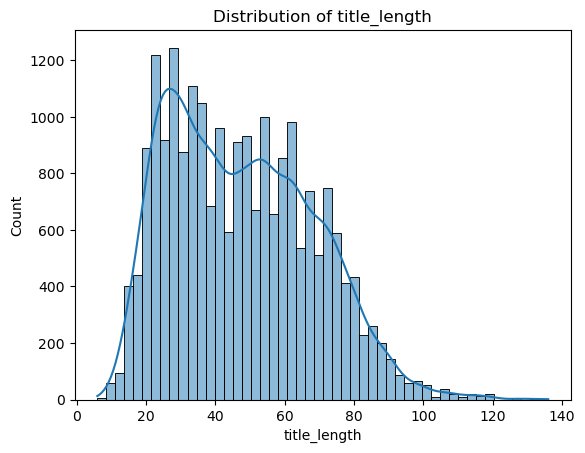

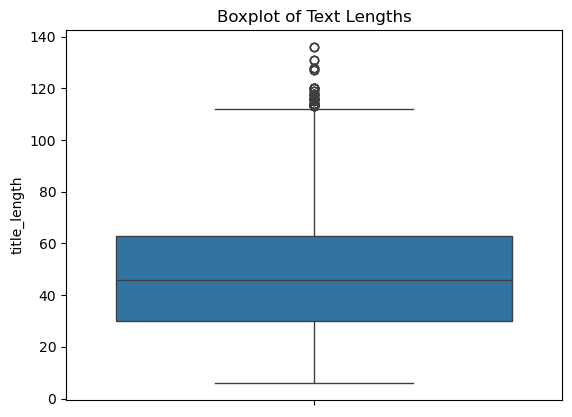

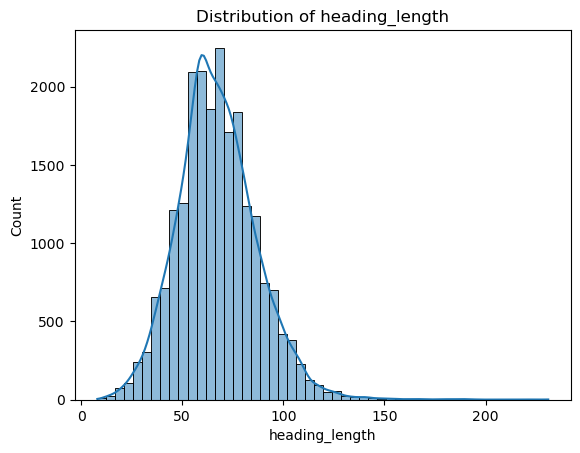

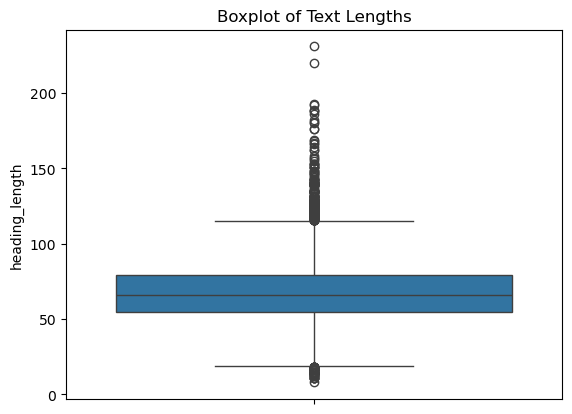

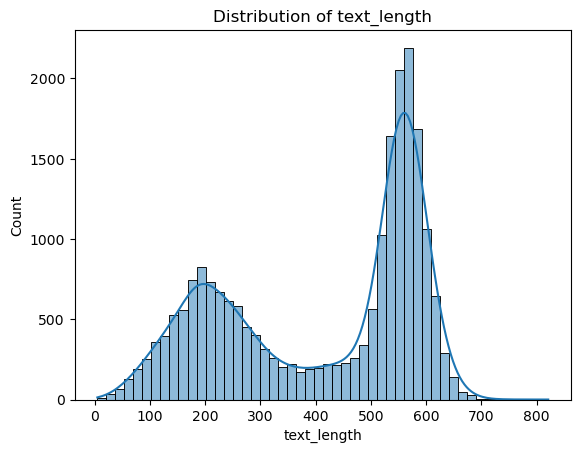

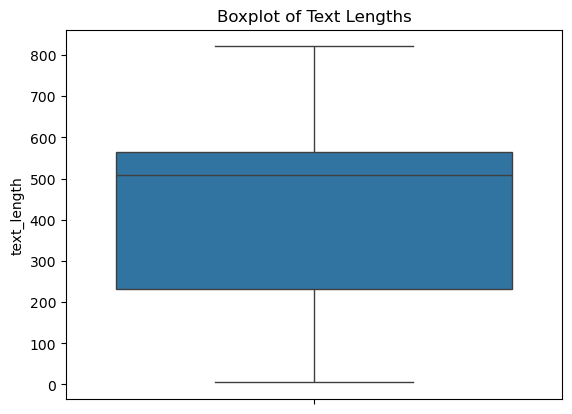

In [182]:
plot_cols = ["title_length", "heading_length", "text_length"]

for col in plot_cols:
    sns.histplot(data_tag_as_lists[col], bins=50, kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()

    sns.boxplot( data=data_tag_as_lists[col])
    plt.title("Boxplot of Text Lengths")
    plt.show()

   

In [183]:
data_tag_as_lists[plot_cols].describe()

,title_length,heading_length,text_length
count,21747.000000,21747.000000,21747.000000
mean,47.529544,67.334943,413.432014
std,20.762094,19.550234,177.415331
min,6.000000,8.000000,5.000000
25%,30.000000,55.000000,232.000000
50%,46.000000,66.000000,509.000000
75%,63.000000,79.000000,564.000000
max,136.000000,231.000000,821.000000


In [214]:
def compute_IQR(col_name):
    Q1 = data_tag_as_lists[col_name].quantile(0.25)
    Q3 = data_tag_as_lists[col_name].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    return max(data_tag_as_lists[col_name].min(),lower_bound), upper_bound

def filter_outliers(col_name,lower_bound,upper_bound):
    return data_tag_as_lists[col_name].apply(lambda x: (x < lower_bound) | (x > upper_bound)) 

In [270]:
lower_bound, upper_bound = compute_IQR("text_length")
print(lower_bound," ",upper_bound)
# title_outliers_title_len = data_tag_as_lists.loc[filter_outliers("title_length",lower_bound+10,upper_bound),"title_length"]
# title_outliers_text_len = data_tag_as_lists.loc[filter_outliers("title_length",lower_bound+10,upper_bound),"text_length"]
text_outliers_df = data_tag_as_lists[filter_outliers("text_length",50,upper_bound)]

5   1062.0


In [273]:
data_tag_as_lists.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21741 entries, 0 to 21753
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   title           21741 non-null  object
 1   title_length    21741 non-null  int64 
 2   tags            21741 non-null  object
 3   heading         21741 non-null  object
 4   heading_length  21741 non-null  int64 
 5   source          21741 non-null  object
 6   text            21741 non-null  object
 7   text_length     21741 non-null  int64 
 8   bias_rating     21741 non-null  object
dtypes: int64(3), object(6)
memory usage: 1.7+ MB


In [275]:
data_tag_as_lists.insert(3,"tag_count",data_tag_as_lists["tags"].apply(lambda x: len(x)))

In [278]:
data_tag_as_lists["bias_rating"].value_counts()

bias_rating
left      10271
right      7218
center     4252
Name: count, dtype: int64

In [279]:
data = data_tag_as_lists.copy()

In [280]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21741 entries, 0 to 21753
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   title           21741 non-null  object
 1   title_length    21741 non-null  int64 
 2   tags            21741 non-null  object
 3   tag_count       21741 non-null  int64 
 4   heading         21741 non-null  object
 5   heading_length  21741 non-null  int64 
 6   source          21741 non-null  object
 7   text            21741 non-null  object
 8   text_length     21741 non-null  int64 
 9   bias_rating     21741 non-null  object
dtypes: int64(4), object(6)
memory usage: 1.8+ MB


In [281]:
from sklearn.model_selection import train_test_split

In [307]:
feature_columns = ["text", "title_length", "heading_length", "text_length", "source","tag_count"]

X = data_tag_as_lists[feature_columns]
y = data_tag_as_lists["bias_rating"]

# Then split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)




In [286]:
X_train.isna().sum(), X_test.isna().sum()

(title             0
 title_length      0
 tags              0
 tag_count         0
 heading           0
 heading_length    0
 source            0
 text              0
 text_length       0
 dtype: int64,
 title             0
 title_length      0
 tags              0
 tag_count         0
 heading           0
 heading_length    0
 source            0
 text              0
 text_length       0
 dtype: int64)

<Axes: >

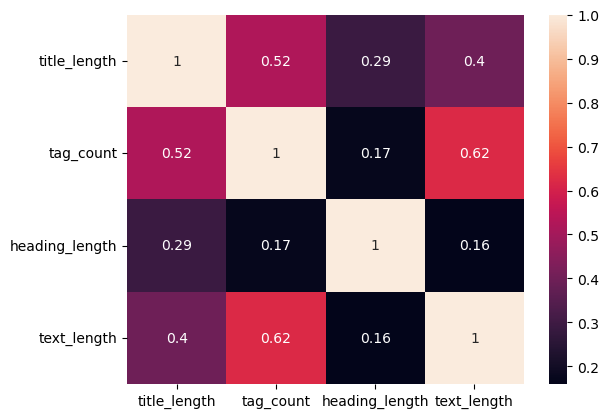

In [289]:
numeric_cols = X_train.select_dtypes(include= "number").columns
X_train_corr = X_train[numeric_cols].corr()
sns.heatmap(X_train_corr, annot = True)

In [296]:
from sklearn.feature_selection import f_classif
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21741 entries, 0 to 21753
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   title           21741 non-null  object
 1   title_length    21741 non-null  int64 
 2   tags            21741 non-null  object
 3   tag_count       21741 non-null  int64 
 4   heading         21741 non-null  object
 5   heading_length  21741 non-null  int64 
 6   source          21741 non-null  object
 7   text            21741 non-null  object
 8   text_length     21741 non-null  int64 
 9   bias_rating     21741 non-null  object
dtypes: int64(4), object(6)
memory usage: 1.8+ MB


In [299]:
num_cols = ["title_length", "heading_length", "text_length", "tag_count"]
cat_cols = ["source"]
target_col = "bias_rating"

In [312]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

text_transformer = TfidfVectorizer(
    max_features=5000,    
    stop_words="english", 
    ngram_range=(1,2)      
)
categorical_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

numeric_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

preprocessor = ColumnTransformer([
    ("num", numeric_pipeline, num_cols),
    ("cat", categorical_pipeline, cat_cols),
    ("text",text_transformer,"text")
])

X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)


In [313]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

models = {
    "LogisticRegression": LogisticRegression(max_iter=1000, class_weight="balanced", random_state=42),
    "RandomForest": RandomForestClassifier(n_estimators=200, class_weight="balanced", random_state=42),
    "XGBoost": xgb.XGBClassifier(use_label_encoder=False, eval_metric="mlogloss", random_state=42)
}

In [319]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
# Encode target labels once
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

for name, model in models.items():
    print(f"\n=== {name} ===")

    # Fit all models on encoded labels
    model.fit(X_train_preprocessed, y_train_encoded)
    y_pred = model.predict(X_test_preprocessed)

    # Evaluation (map back for readability)
    print("Confusion Matrix:")
    print(confusion_matrix(y_test_encoded, y_pred))
    print("\nClassification Report:")
    print(classification_report(y_test_encoded, y_pred, target_names=le.classes_))


=== LogisticRegression ===
Confusion Matrix:
[[ 841    8    1]
 [   9 2045    1]
 [   9    5 1430]]

Classification Report:
              precision    recall  f1-score   support

      center       0.98      0.99      0.98       850
        left       0.99      1.00      0.99      2055
       right       1.00      0.99      0.99      1444

    accuracy                           0.99      4349
   macro avg       0.99      0.99      0.99      4349
weighted avg       0.99      0.99      0.99      4349


=== RandomForest ===
Confusion Matrix:
[[ 748   94    8]
 [   4 2040   11]
 [   2   67 1375]]

Classification Report:
              precision    recall  f1-score   support

      center       0.99      0.88      0.93       850
        left       0.93      0.99      0.96      2055
       right       0.99      0.95      0.97      1444

    accuracy                           0.96      4349
   macro avg       0.97      0.94      0.95      4349
weighted avg       0.96      0.96      0.96      

/opt/miniconda3/envs/myenv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [14:50:51] WARNING: /var/folders/k1/30mswbxs7r1g6zwn8y4fyt500000gp/T/abs_abwcuua5oq/croot/xgboost-split_1749630928197/work/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Confusion Matrix:
[[ 797   52    1]
 [   1 2051    3]
 [   1   35 1408]]

Classification Report:
              precision    recall  f1-score   support

      center       1.00      0.94      0.97       850
        left       0.96      1.00      0.98      2055
       right       1.00      0.98      0.99      1444

    accuracy                           0.98      4349
   macro avg       0.98      0.97      0.98      4349
weighted avg       0.98      0.98      0.98      4349

